# K-Nearest Neighbors

In [5]:
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('HD.csv')

In [7]:
data.shape

(1888, 14)

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
X=data.drop(columns='target',axis=1)
y=data['target']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
neighbors=np.arange(1,100)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))


In [26]:
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)
    
print("train_accuracy:-",train_accuracy)
print("test_accuracy:-",test_accuracy)

train_accuracy:- [1.         0.94019682 0.8682816  0.85995458 0.85616957 0.83118849
 0.80696442 0.77668433 0.73959122 0.72672218 0.70779712 0.69492808
 0.69114307 0.70249811 0.71158213 0.71461014 0.72218017 0.70174111
 0.69190008 0.71006813 0.71006813 0.71536715 0.70704012 0.71082513
 0.71839516 0.6987131  0.67676003 0.665405   0.65859198 0.666919
 0.67676003 0.68357305 0.68433005 0.68130204 0.68357305 0.68735806
 0.68054504 0.67070401 0.66994701 0.67221802 0.666919   0.666162
 0.66086298 0.65177896 0.65707797 0.65404996 0.65556397 0.6343679
 0.63512491 0.63512491 0.63815291 0.64042392 0.64799394 0.63739591
 0.64118092 0.64647994 0.64875095 0.65329296 0.64420893 0.64875095
 0.63815291 0.64572294 0.64420893 0.64420893 0.63966692 0.6336109
 0.63058289 0.64420893 0.64345193 0.63890992 0.64723694 0.64269493
 0.63815291 0.63890992 0.64420893 0.64723694 0.64572294 0.64420893
 0.64723694 0.64647994 0.64042392 0.64193793 0.63133989 0.62831188
 0.63133989 0.62149886 0.62074186 0.62149886 0.6298

In [18]:
import matplotlib.pyplot as plt

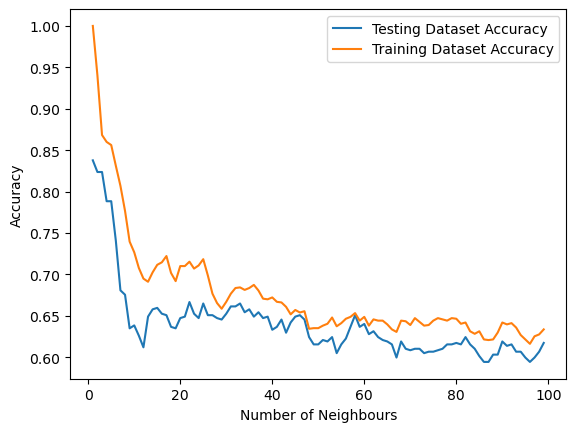

In [27]:
plt.plot(neighbors, test_accuracy, label = "Testing Dataset Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Dataset Accuracy")

plt.legend()
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.show()

**K-Nearest Neighbors (KNN) Interpretation:**

 **Low k Values**:  
- The model is too complex, resulting in **low bias** but **high variance**.  
- It memorizes the training data, leading to overfitting and poor generalization to new data.

**High k Values**:  
- The model is too simple, resulting in **high bias** but **low variance**.  
- It fails to capture important patterns in the data, leading to underfitting.

**Best Performance**:  
- The optimal value of k  is where the testing accuracy peaks.  
- In this case, the ideal range appears to be between **3 to 10 neighbors**, where the model achieves its highest accuracy on the testing dataset.


In [30]:
from sklearn.metrics import accuracy_score,classification_report

In [40]:
KNN=KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
prediction=KNN.predict(X_test)
accuracy=accuracy_score(y_test,prediction)
print(accuracy)

0.6384479717813051


In [45]:
data.shape

(1888, 14)

In [51]:
x_new=[63,1,3,145,103,1,0,150,0,2.3,0,0,1]

new_shape=np.array(x_new).reshape(1,-1)

predict=KNN.predict(new_shape)

print(predict)

[0]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### New Dataset

In [65]:
drug=pd.read_csv(r"C:\Users\Admin\MSc Applied Statistics SPU\csv file\drug200.csv")

In [66]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [68]:
columns=drug.select_dtypes(include=(object)).columns
rev={}

for col in columns:
    drug[col]=le.fit_transform(drug[col])
    rev[col]=le
    



In [69]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [70]:
drug.shape

(200, 6)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
neighbors=np.arange(1,50)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [75]:
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)
    
print(train_accuracy)
print(test_accuracy)

[1.         0.94019682 0.8682816  0.85995458 0.85616957 0.83118849
 0.80696442 0.77668433 0.73959122 0.72672218 0.70779712 0.69492808
 0.69114307 0.70249811 0.71158213 0.71461014 0.72218017 0.70174111
 0.69190008 0.71006813 0.71006813 0.71536715 0.70704012 0.71082513
 0.71839516 0.6987131  0.67676003 0.665405   0.65859198 0.666919
 0.67676003 0.68357305 0.68433005 0.68130204 0.68357305 0.68735806
 0.68054504 0.67070401 0.66994701 0.67221802 0.666919   0.666162
 0.66086298 0.65177896 0.65707797 0.65404996 0.65556397 0.6343679
 0.63512491]
[0.8377425  0.82363316 0.82363316 0.78835979 0.78835979 0.74074074
 0.68077601 0.67548501 0.63492063 0.63844797 0.62610229 0.61199295
 0.64902998 0.65784832 0.65961199 0.65255732 0.65079365 0.6366843
 0.63492063 0.64726631 0.64902998 0.66666667 0.65255732 0.64726631
 0.664903   0.65079365 0.65079365 0.64726631 0.64550265 0.65255732
 0.66137566 0.66137566 0.664903   0.65432099 0.65784832 0.64902998
 0.65432099 0.64726631 0.64902998 0.63315697 0.6366843 

In [76]:
import matplotlib.pyplot as plt

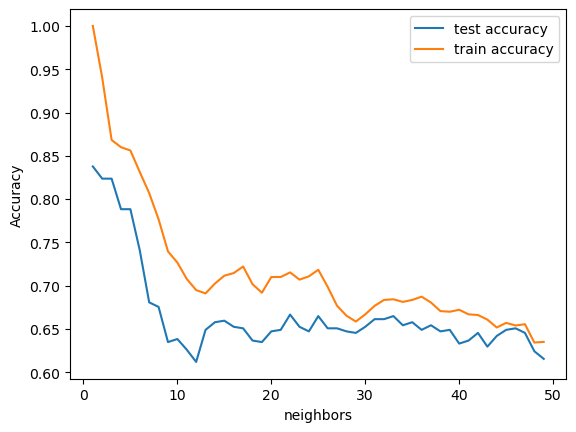

In [77]:
plt.plot(neighbors,test_accuracy,label="test accuracy")
plt.plot(neighbors,train_accuracy,label="train accuracy")

plt.legend()
plt.xlabel("neighbors")
plt.ylabel("Accuracy")
plt.show()